## H1N1 AND SEASONAL FLU VACCINE PREDICTION

### PROBLEM STATEMENT

#### DATA UNDERSTANDING

##### Loading the Datasets

In [1]:
#Importing the necessary libraries
import pandas as pd

I started by loading the test dataset and investigating the shape and the statistical properties of the dataset. I also explored the columns and the datatypes.

In [2]:
#loading the test dataset and viewing the first 5 rows
df_test = pd.read_csv(r"C:\Users\hp\Documents\phase3project\Data\test_set_features.csv")
df_test.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [3]:
#viewing the size of the the test data
df_test.shape

#overview of the statistical properties of the test dataset
df_test.describe()

#overview of the structure and datatypes of the test dataset
df_test.info

<bound method DataFrame.info of        respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              26707           2.0             2.0                        0.0   
1              26708           1.0             1.0                        0.0   
2              26709           2.0             2.0                        0.0   
3              26710           1.0             1.0                        0.0   
4              26711           3.0             1.0                        1.0   
...              ...           ...             ...                        ...   
26703          53410           1.0             1.0                        0.0   
26704          53411           3.0             1.0                        0.0   
26705          53412           0.0             1.0                        0.0   
26706          53413           3.0             1.0                        0.0   
26707          53414           2.0             1.0                        0.0

The next step is to load the training data dataset and investigating the structure, statistical overview and datatypes.

In [4]:
#loading the training data and viewing the first 5 rows
df_train = pd.read_csv(r"C:\Users\hp\Documents\phase3project\Data\training_set_features.csv")
df_train.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
#loading the data labels
df_label = pd.read_csv(r"C:\Users\hp\Documents\phase3project\Data\training_set_labels.csv")
df_label

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [6]:
#merging the training datasets
df = pd.merge(df_train, df_label, on="respondent_id")
df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [7]:
#viewing the size of the the train data
df.shape

#overview of the statistical properties of the train dataset
df.describe()

#overview of the structure and datatypes of the train dataset
df.info

<bound method DataFrame.info of        respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                  0           1.0             0.0                        0.0   
1                  1           3.0             2.0                        0.0   
2                  2           1.0             1.0                        0.0   
3                  3           1.0             1.0                        0.0   
4                  4           2.0             1.0                        0.0   
...              ...           ...             ...                        ...   
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0                        0.0

### DATA CLEANING
Dealing with the training dataset first

In [8]:
#dropping duplicates in the training datasets
df.drop_duplicates()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [9]:
#defining a function to calculate the percentage of missing values
def missing_values_percentage(df):
    missing_values = []
    for column in df.columns:
        num_missing = df[column].isna().sum()
        total_rows = len(df)
        missing_percent = (num_missing / total_rows) * 100
        missing_values.append(missing_percent)

    missing_df = pd.DataFrame({'Missing Values (%)': missing_values}, index=df.columns)
    return missing_df

In [10]:
#checking the percentage of missing values in the training dataset
missing_percentage = missing_values_percentage(df)
missing_percentage

,Missing Values (%)
respondent_id,0.000000
h1n1_concern,0.344479
h1n1_knowledge,0.434343
behavioral_antiviral_meds,0.265848
behavioral_avoidance,0.778822
behavioral_face_mask,0.071142
behavioral_wash_hands,0.157262
behavioral_large_gatherings,0.325757
behavioral_outside_home,0.307036
behavioral_touch_face,0.479275


Dealing with the test dataset

In [11]:
#dropping duplicates in the dataset
df_test.drop_duplicates()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN


In [12]:
#checking for missing values percentage in the test dataset
missing_test = missing_values_percentage(df_test)
missing_test

,Missing Values (%)
respondent_id,0.000000
h1n1_concern,0.318257
h1n1_knowledge,0.456792
behavioral_antiviral_meds,0.295792
behavioral_avoidance,0.797514
behavioral_face_mask,0.071140
behavioral_wash_hands,0.149768
behavioral_large_gatherings,0.269582
behavioral_outside_home,0.307024
behavioral_touch_face,0.479257


#### EXPLORATORY DATA ANALYSIS.

In [13]:
#importing the necessary datasets
import seaborn as sns  
import matplotlib.pyplot as plt
import numpy as np

### BAR PLOT
Creating a bar plot to investigate the distribution of the education level in the dataset

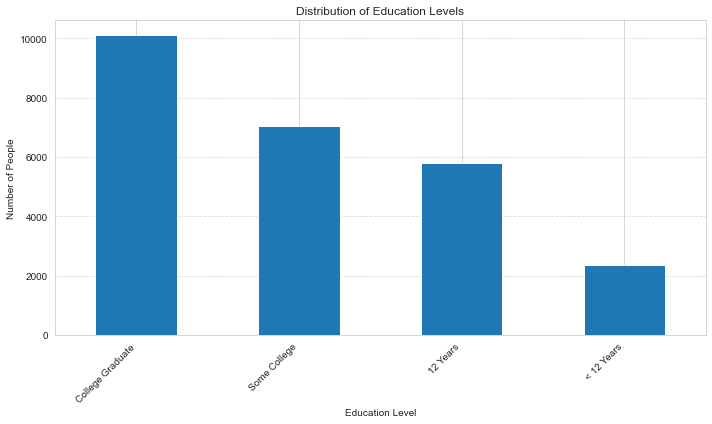

In [14]:
#creating a barplot
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6)) 

df['education'].value_counts().plot(kind='bar', title='Education Distribution')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title("Distribution of Education Levels")
plt.xlabel("Education Level")
plt.ylabel("Number of People")

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

The highest bar corresponds to "College Graduate," indicating that this is the most common education level among the individuals in the dataset.
Decreasing Frequency: As we move from "Some College" to "12 Years" and then to "<< 12 Years," the height of the bars decreases. This suggests that fewer individuals have these lower levels of education.

#### HISTOGRAM 


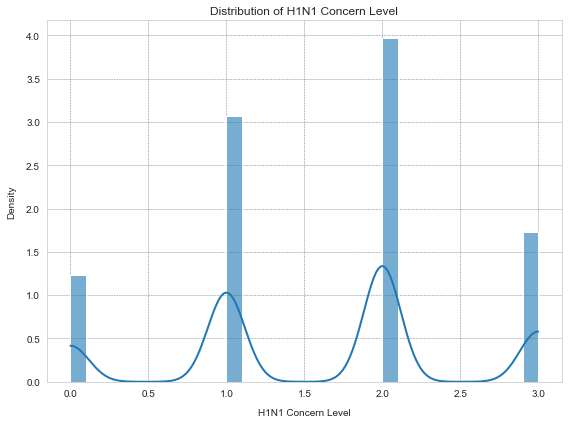

In [15]:
#plotting a histogram with a kde plot
sns.set_style("whitegrid")  
plt.figure(figsize=(8, 6)) 
sns.histplot(
    data=df,
    x="h1n1_concern",
    bins=30, 
    kde=True,
    stat="density",  
    line_kws={"color": "red", "lw": 2},  
    fill=True,  
    alpha=0.6,  
)

plt.xlabel("H1N1 Concern Level", labelpad=10) 
plt.ylabel("Density", labelpad=10)  

plt.title("Distribution of H1N1 Concern Level")
plt.grid(True, linestyle="--", linewidth=0.5, color="gray", which="both", axis="both")
plt.tight_layout()

plt.show()

From the plot above, it shows that people have different levels of concern about H1N1. Most people have low concern, but some people have high concern. This means that the distribution of concern is not evenly spread out. Instead, it has two peaks.

#### COUNTPLOTS
The count plots are used to show the distribution of h1n1_vaccine and seasonal_vaccine.

In [16]:
#defining a function to create a countplot
def countplot(df, x_var, title):
    sns.set_style("whitegrid")  
    plt.figure(figsize=(8, 6)) 

    sns.countplot(x=x_var, data=df, palette="Set2") 

    plt.xlabel(x_var, labelpad=10)  
    plt.ylabel("Count", labelpad=10)

    plt.title(title)
    plt.xticks(rotation=45, ha="right") 

    plt.grid(True, linestyle="--", linewidth=0.5, color="gray", which="both", axis="both")
    plt.tight_layout()  

    plt.show()

Creating a countplot for h1n1_vaccine:

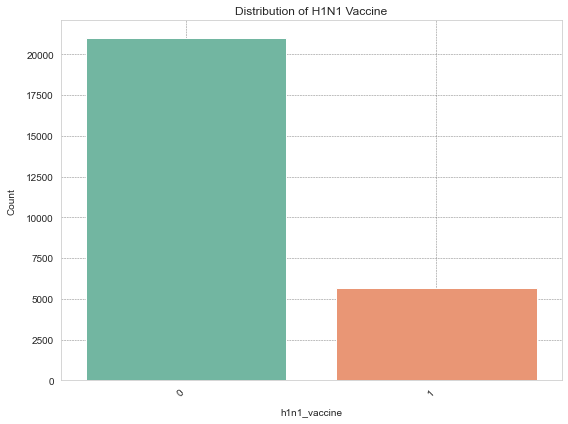

In [17]:
#creating a countplot for h1n1 vaccine
countplot(df, 'h1n1_vaccine', "Distribution of H1N1 Vaccine")

From the above countplot, majority of the people did not receive the H1N1 vaccine. The bar corresponding to '0'(no vaccine) is significantly taller the the bar '1'(received vaccine). This indicates that majority of the individual in this dataset did not receive the H1N1 vaccine.

Creating a countplot for seasonal vaccine:

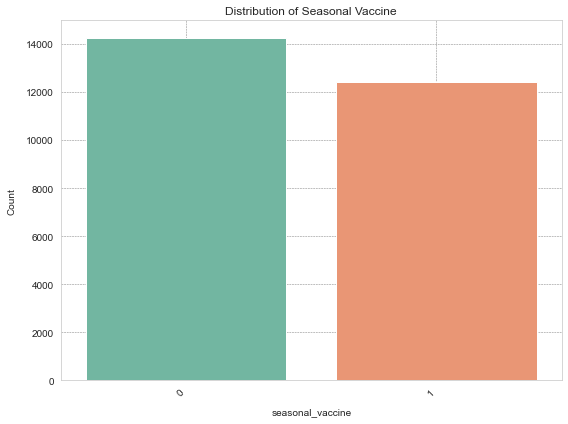

In [18]:
countplot(df, 'seasonal_vaccine', "Distribution of Seasonal Vaccine")

Majority of people received the seasonal vaccine: The bar corresponding to "1" (received vaccine) is taller than the bar for "0" (no vaccine). This indicates that a larger majority of individuals in the dataset received the seasonal vaccine.

A smaller proportion did not receive the seasonal vaccine: The bar for "0" is shorter, suggesting that only a minority of individuals did not receive the vaccine.

##### BARPLOT TO INVESTIGATE THE RELATIONSHIP BETWEEN EDUCATION LEVEL AND H1N1 VACCINE UPTAKE

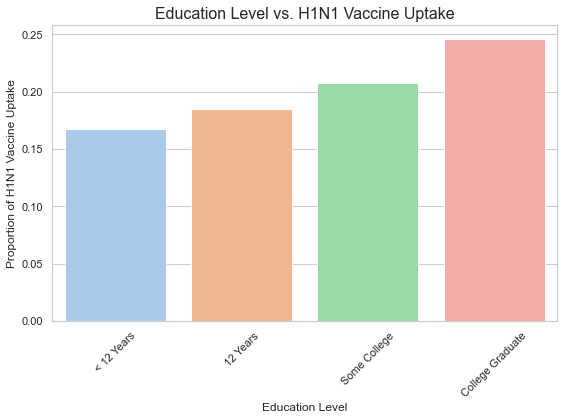

In [20]:
#plotting the bar plot
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(8, 6))
education_order = ['< 12 Years', '12 Years', 'Some College', 'College Graduate']
sns.barplot(x='education', y='h1n1_vaccine', data=df, order=education_order, ci=None)
plt.title('Education Level vs. H1N1 Vaccine Uptake', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Proportion of H1N1 Vaccine Uptake', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar plot illustrates the relationship between education level and the proportion of individuals who received the H1N1 vaccine.
Individuals with a college graduate degree have the highest proportion of H1N1 vaccine uptake. As education level decreases, the proportion of individuals receiving the vaccine also tends to decrease. There appears to be a noticeable difference in vaccination rates between those with some college education and those with less than 12 years of education.

##### SCATTERPLOT TO INVESTIGATE THE RELATIONSHIP BETWEEN AGE GROUP AND SEX VS H1N1 VACCINE UPTAKE

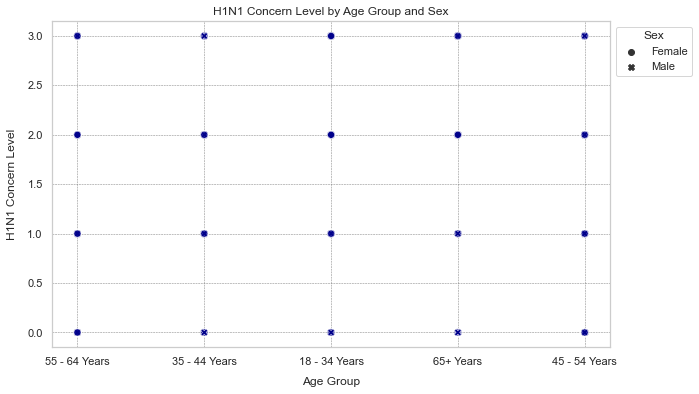

In [21]:
#plotting a scatterplot
sns.set_style("whitegrid")  
plt.figure(figsize=(10, 6))  
ax = sns.scatterplot(
    x="age_group",
    y="h1n1_concern",
    color="darkblue",
    data=df,
    style="sex",  
    s=50,  
    alpha=0.7, 
)
plt.xlabel("Age Group", labelpad=10)  
plt.ylabel("H1N1 Concern Level", labelpad=10)
plt.title("H1N1 Concern Level by Age Group and Sex")
plt.grid(True, linestyle="--", linewidth=0.5, color="gray", which="both", axis="both")
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, title="Sex", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

The scatter plot suggests that age group is a stronger predictor of H1N1 concern than sex, with younger individuals expressing higher levels of concern. There appears to be a general trend where younger age groups (18-34 years) express higher levels of H1N1 concern compared to older age groups (55-64 years and 65+ years).

### DATA PREPROCESSING

In [22]:
#making a copy of the original training and testing dataset
df2_train = df.copy()
df2_test = df_test.copy()

In [25]:
#defining a function to obtain categorical columns
def get_categorical_columns(df):
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    return categorical_columns

In [26]:
#defining a function to obtain numerical columns
def get_numerical_columns(df):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    return numerical_columns

### HANDLING MISSING VALUES

In [27]:
#defining a function fill missing values in the numerical columns with the median
def clean_numerical_with_median(df, columns):
    for col in columns:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)

    return df